In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
C = np.array([[1,5],
              [3,2]])

In [3]:
def softmax(matrix):

    # Subtract the max for numerical stability
    exp_matrix = np.exp(matrix - np.max(matrix, axis=0, keepdims=True))
    # Apply softmax
    softmax_matrix = exp_matrix / np.sum(exp_matrix, axis=0, keepdims=True)
    return softmax_matrix

softmax_matrix = softmax(C)
print(softmax_matrix)

[[0.11920292 0.95257413]
 [0.88079708 0.04742587]]


In [4]:
def normalize_row(row):
    row_sum = np.sum(row)
    if row_sum > 1:
        return row / row_sum
    return row

def normalize_matrix_rows(matrix):
    # Apply normalization to each row
    normalized_mat = np.array([normalize_row(row) for row in matrix])
    return normalized_mat


# Example usage
matrix = C.copy()

normalized_matrix = normalize_matrix_rows(matrix)
print(normalized_matrix)

[[0.16666667 0.83333333]
 [0.6        0.4       ]]


In [5]:
def get_row_sums(matrix):
  return np.sum(matrix, axis=1)
def get_col_sums(matrix):
  return np.sum(matrix, axis=0)

In [6]:
get_row_sums(matrix = C.copy()),get_col_sums(matrix = C.copy())

(array([6, 5]), array([4, 7]))

In [7]:

def g(matrix):
  ret_mat = normalize_matrix_rows(softmax(matrix)).copy()
  r = get_row_sums(ret_mat)
  c = get_col_sums(ret_mat)
  r_tild = np.ones(len(ret_mat)) - r
  c_tild = np.ones(len(ret_mat)) - c
  # Actual computation
  ret_mat = ret_mat + (1/np.sum(c_tild))*np.outer(r_tild,c_tild)
  return ret_mat

output_mat = g(C.copy())

In [8]:
def check_bistoch(matrix,tolerance = 1e-12):
    if np.any(matrix < 0):
        return False
        
    row_sums = get_row_sums(matrix) 
    if not np.all(np.abs(row_sums - 1) <= tolerance):
        return False
        
    col_sums = get_col_sums(matrix)
    if not np.all(np.abs(col_sums - 1) <= tolerance):
        return False
    else:
        return True

In [9]:
print(check_bistoch(output_mat))
print(check_bistoch(output_mat + 1e-11*np.ones((2,2))))

True
False


# Testing sofmax Temprature params: Plotting 4d plot

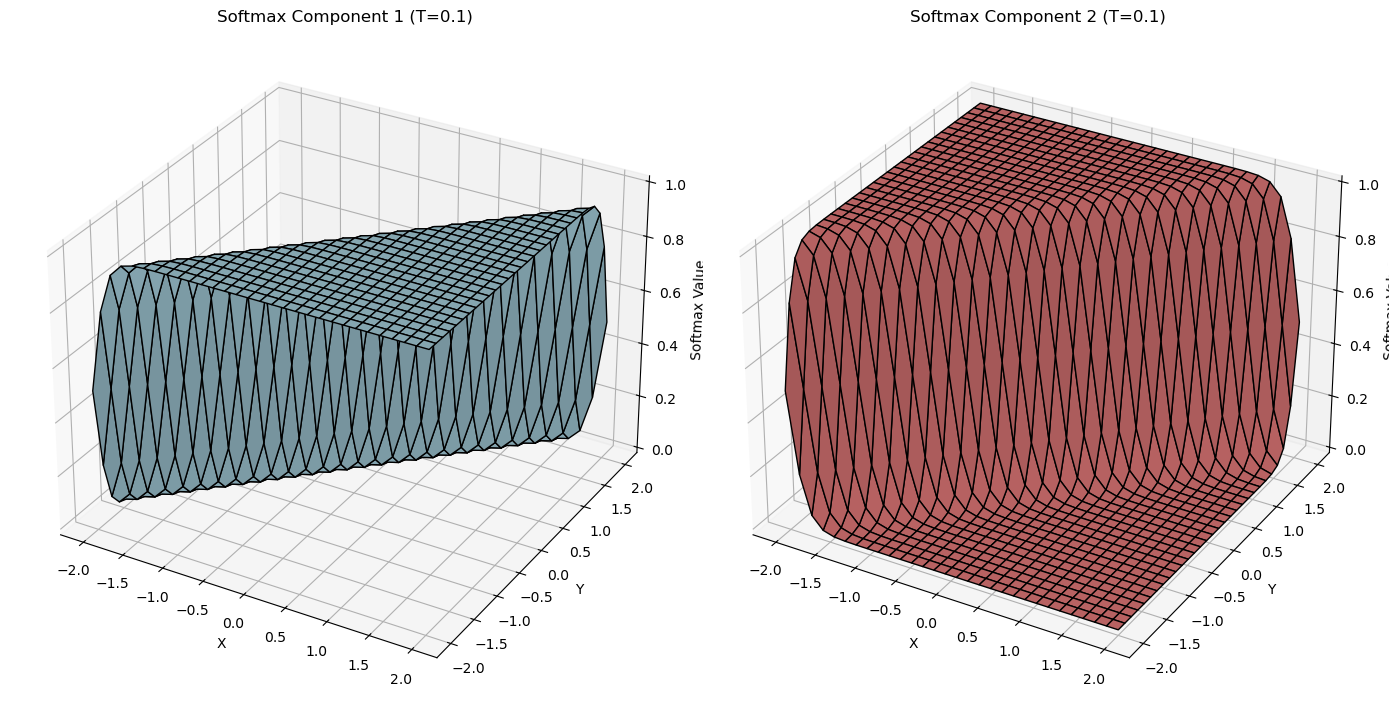

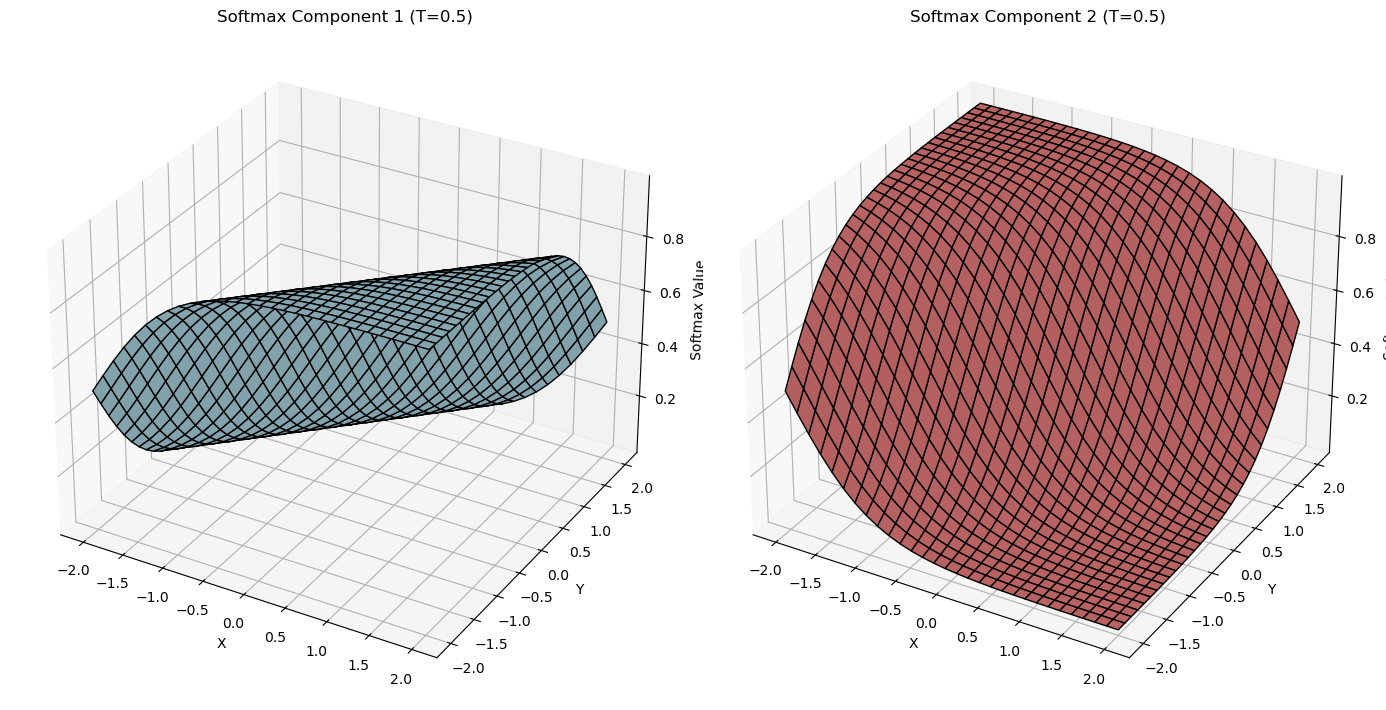

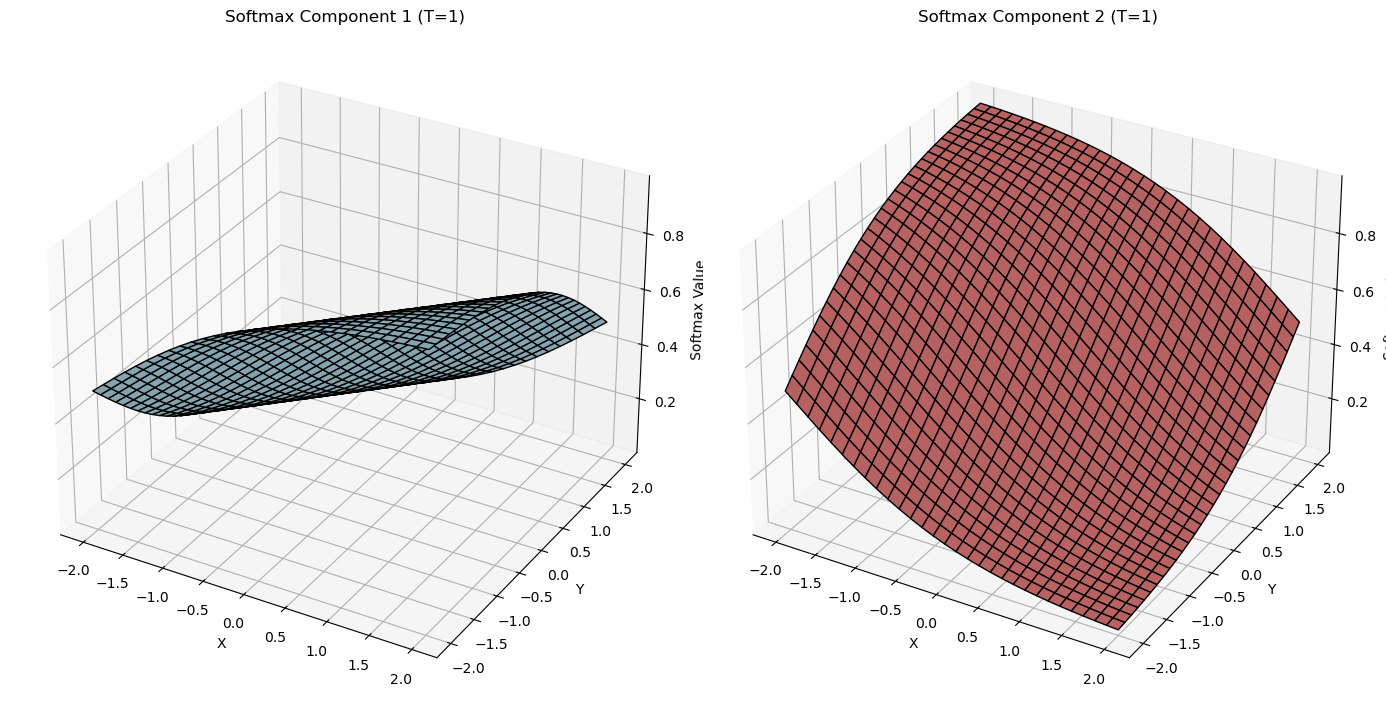

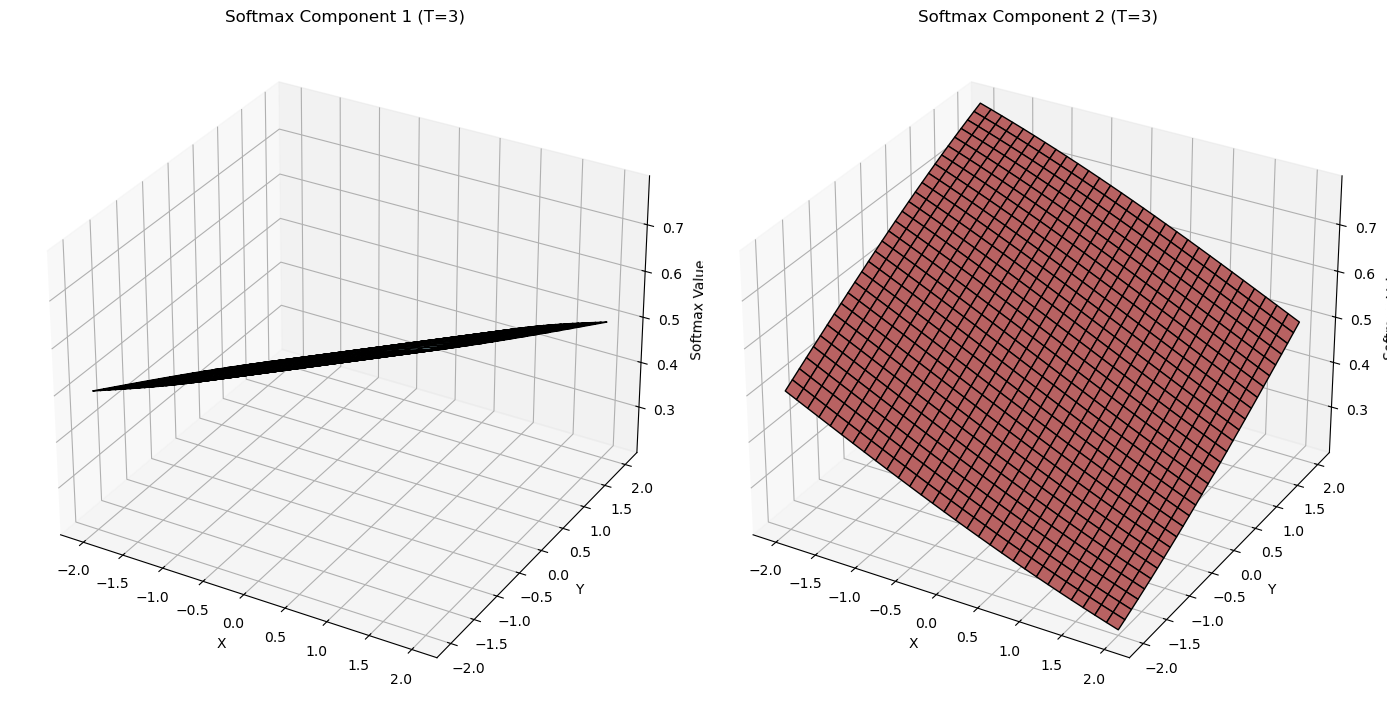

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def softmax_with_temperature(x, T):
    e_x = np.exp(x / T - np.max(x / T, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def plot_softmax_3d_with_temperature(T, x, y):
    # Define the grid
    X, Y = np.meshgrid(x, y)
    Z = np.dstack((X, Y))

    # Compute the softmax with temperature for each point
    S = softmax_with_temperature(Z, T)

    # Create a 3D plot
    fig = plt.figure(figsize=(14, 7))

    # Softmax Component 1
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, S[:, :, 0], color='lightblue', edgecolor='k')
    ax1.set_title(f'Softmax Component 1 (T={T})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Softmax Value')

    # Softmax Component 2
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, S[:, :, 1], color='lightcoral', edgecolor='k')
    ax2.set_title(f'Softmax Component 2 (T={T})')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Softmax Value')

    plt.tight_layout()
    plt.show()

# Define grid
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

# Example temperature values
temperatures = [0.1, 0.5,1, 3]

for T in temperatures:
    plot_softmax_3d_with_temperature(T, x, y)
